# Supplementary Figure 3

In [1]:
import os.path as op
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import plotutils

In [2]:
df_dir = op.join('..', 'data', 'dataframes')

In [3]:
subjects, rois, tasks = plotutils.default_data()

In [4]:
plotutils.set_plot_style()

### Load dataframes

In [5]:
params = pd.read_csv(op.join(df_dir, 'group_ang_fits.csv'))

In [6]:
norm_snr = pd.read_csv(op.join(df_dir, 'sim_snr_group_ang_data.csv'))
params_snr = pd.read_csv(op.join(df_dir, 'sim_snr_group_ang_fits.csv'))

norm_lapse = pd.read_csv(op.join(df_dir, 'sim_lapse_group_ang_data.csv'))
params_lapse = pd.read_csv(op.join(df_dir, 'sim_lapse_group_ang_fits.csv'))

norm_assoc = pd.read_csv(op.join(df_dir, 'sim_assoc_group_ang_data.csv'))
params_assoc = pd.read_csv(op.join(df_dir, 'sim_assoc_group_ang_fits.csv'))

norm_ang = pd.read_csv(op.join(df_dir, 'sim_ang_group_ang_data.csv'))
params_ang = pd.read_csv(op.join(df_dir, 'sim_ang_group_ang_fits.csv'))

### Define plot style

In [7]:
def plot_sims(norm_sim, params_sim, sim_var, roi):
    
    theta = np.linspace(-np.pi, np.pi, 361) 
    
    # Plot the fit von mises distributions from Fig 4
    g = sns.FacetGrid(hue='simulation', col=sim_var, col_order=sorted(params_sim[sim_var].unique()),
                      height=3.5, aspect=.9, data=norm_sim.query("roi==@roi"))
    
    for (n, t) in itertools.product(g.col_names, tasks):
        ax_i = norm_sim[sim_var].unique().tolist().index(n)
        p = params.query("roi==@roi & task==@t").iloc[0][['loc', 'kappa1', 'scale1', 'kappa2', 'scale2']]
        yhat = plotutils.diff_vonmises(theta, *p)
        g.axes.flatten()[ax_i].plot(np.rad2deg(theta), yhat, linewidth=3, c=pal_dict[t], label=t) #plot in degrees
    
    # Plot fit von mises for each simulation
    for n in g.col_names:
        ax_i = sorted(norm_sim[sim_var].unique()).index(n)
        simcol = params_sim[params_sim[sim_var] == n]
        psim = simcol.query("roi==@roi")[['loc', 'kappa1', 'scale1', 'kappa2', 'scale2']]
        yhat_sim = [plotutils.diff_vonmises(theta, *p[1].values) for p in psim.iterrows()]
        for yh in yhat_sim:
            g.axes.flatten()[ax_i].plot(np.rad2deg(theta), yh, linewidth=.4, alpha=1, c=".7", 
                                        zorder=0)

    g.map(plt.axhline, y=0, c=".3", linewidth=.8, ls=":", zorder=0)
    g.set(xticks=np.arange(-180, 225, 90), ylim=[-.5, 1.7], yticks=[-.5, 0, .5, 1, 1.5])
    g.set_xlabels('Polar angle distance ($\\degree$)')
    g.set_ylabels('% signal change')
    plt.gca().text(110, 1.1, roi, style='italic', fontweight='bold', color=roi_pal[rois.index(roi)])

    sns.despine(trim=True)
    plt.gcf().tight_layout(w_pad=1)

    return g

### Supplementary Figure 3a

In [8]:
pal = ['#d95f02', '#e6a778']
pal_dict = dict(zip(tasks, pal))

roi_pal = ['#c44e52', '#dd8452', '#ccb974', '#55a868', '#4c72b0', '#8172b3']

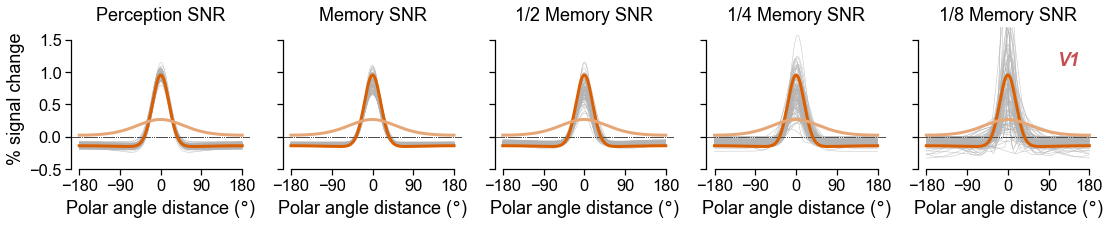

In [9]:
g = plot_sims(norm_snr, params_snr, 'noise_factor', 'V1')
titles = ['Perception SNR', 'Memory SNR', '1/2 Memory SNR', '1/4 Memory SNR', '1/8 Memory SNR']
for ax,t in zip(g.axes.flatten(), titles):
    ax.set_title(t);

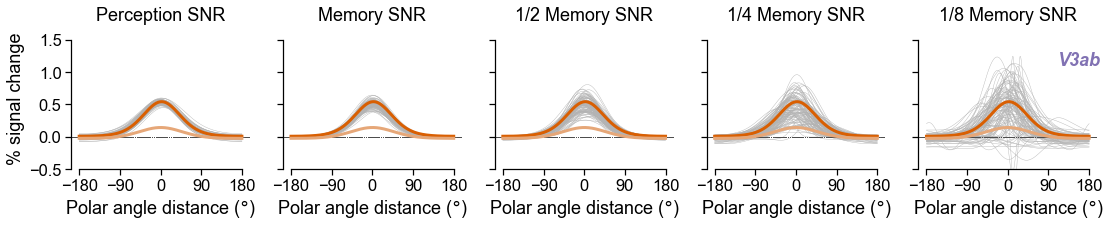

In [10]:
g = plot_sims(norm_snr, params_snr, 'noise_factor', 'V3ab')
for ax,t in zip(g.axes.flatten(), titles):
    ax.set_title(t);

### Supplementary Figure 3b

/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in exp
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))
/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in multiply
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))


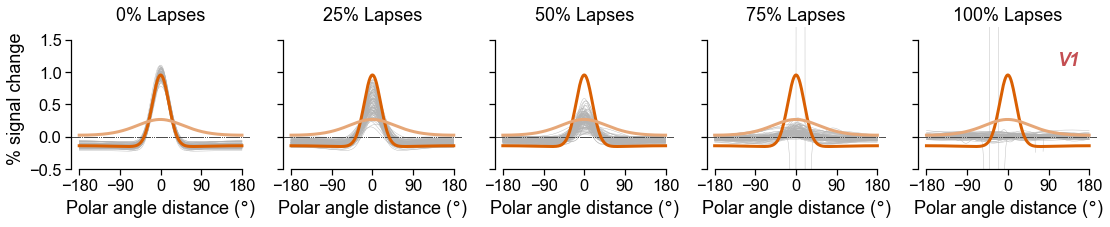

In [11]:
g = plot_sims(norm_lapse, params_lapse, 'nlapse', 'V1')
for i, n in enumerate(g.col_names):
    g.axes.flatten()[i].set_title('%d%% Lapses' %((n/4)*100))

/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in exp
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))
/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in multiply
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))


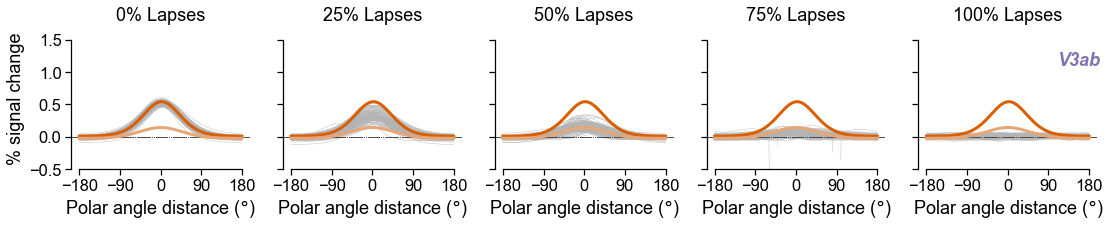

In [12]:
g = plot_sims(norm_lapse, params_lapse, 'nlapse', 'V3ab')
for i, n in enumerate(g.col_names):
    g.axes.flatten()[i].set_title('%d%% Lapses' %((n/4)*100))

### Supplementary Figure 3c

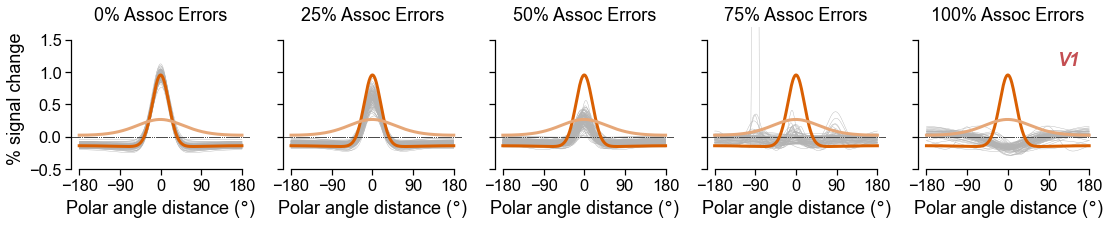

In [13]:
g = plot_sims(norm_assoc, params_assoc, 'n_assoc_err', 'V1')
for i, n in enumerate(g.col_names):
    g.axes.flatten()[i].set_title('%d%% Assoc Errors' %((n/4)*100))

/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in exp
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))
/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in multiply
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))
/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in exp
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))
/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in multiply
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))


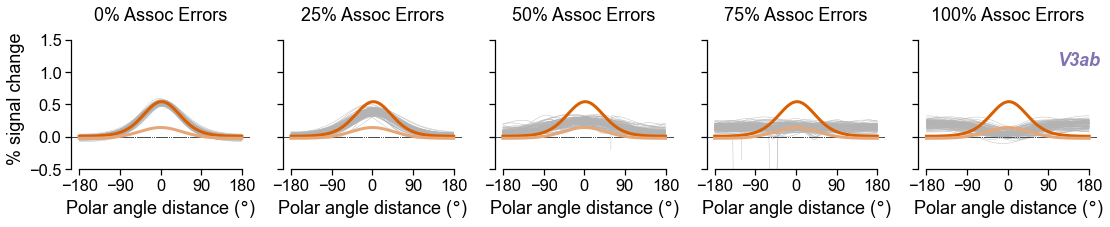

In [14]:
g = plot_sims(norm_assoc, params_assoc, 'n_assoc_err', 'V3ab')
for i, n in enumerate(g.col_names):
    g.axes.flatten()[i].set_title('%d%% Assoc Errors' %((n/4)*100))

### Supplementary Figure 3d

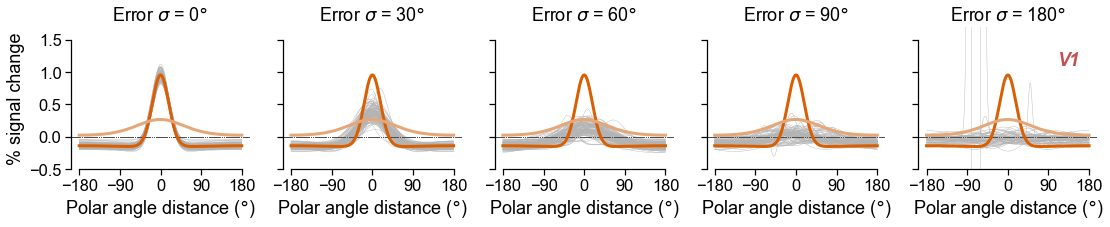

In [15]:
g = plot_sims(norm_ang, params_ang, 'err_std', 'V1')
g.set_titles(col_template="Error $\\sigma$ = {col_name}$\\degree$")

/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in exp
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))
/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in multiply
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))
/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in exp
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))
/Volumes/server/Projects/Spatial_Memory/public/osf/figure_notebooks/plotutils.py:29: RuntimeWarning: overflow encountered in multiply
  p = scale * np.exp(kappa*np.cos(theta-loc))/(2*np.pi*iv(0,kappa))


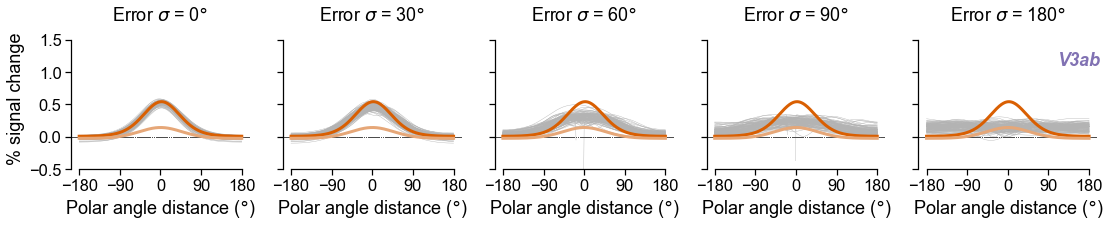

In [16]:
g = plot_sims(norm_ang, params_ang, 'err_std', 'V3ab')
g.set_titles(col_template="Error $\\sigma$ = {col_name}$\\degree$")